# Medical Cost Insurance Prediction

**Author:** [Syed Muhammad Ebad](https://www.kaggle.com/syedmuhammadebad)  
**Date:** 28-Oct-2024  
[Send me an email](mailto:mohammadebad1@hotmail.com)  
[Visit my GitHub profile](https://github.com/smebad)

**Dataset:** [Medical Cost Personal Datasets](https://www.kaggle.com/datasets/mirichoi0218/insurance)

## Project Overview
In this project, we aim to predict medical insurance costs based on variables such as age, BMI, smoking habits, and region. The models explored include Linear Regression and XGBoost Regression. Linear Regression provides a straightforward baseline, while XGBoost, a powerful gradient-boosting model, enhances performance with advanced prediction capabilities.

## 1: Importing Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## 2: Loading and Reviewing the Dataset

In [34]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [35]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Observation:
* We inspect the dataset structure, focusing on data types, missing values, and initial observations.

## 3: Statistical Summary

In [36]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## 4: Data Visualization
The distributions of critical variables like age, bmi, children, and charges are plotted for better understanding.

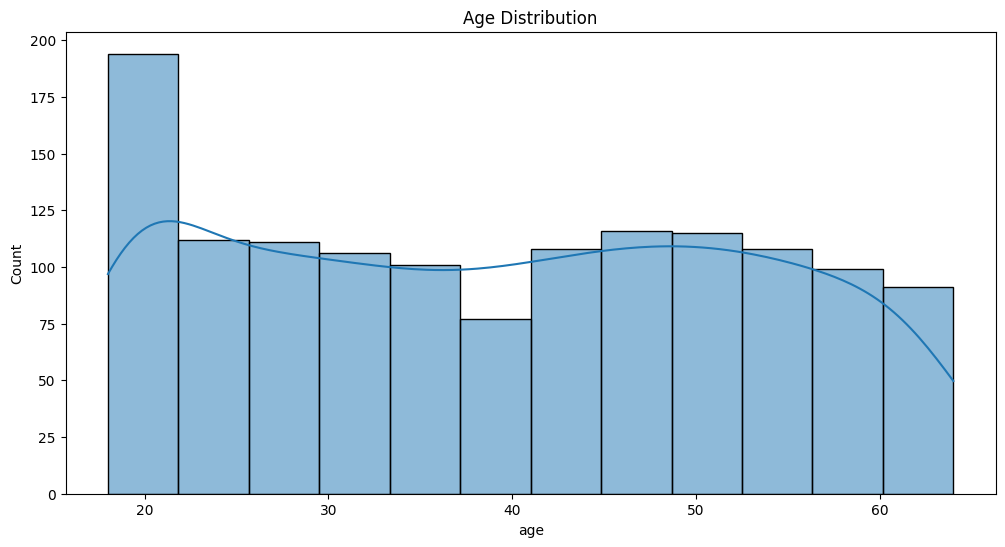

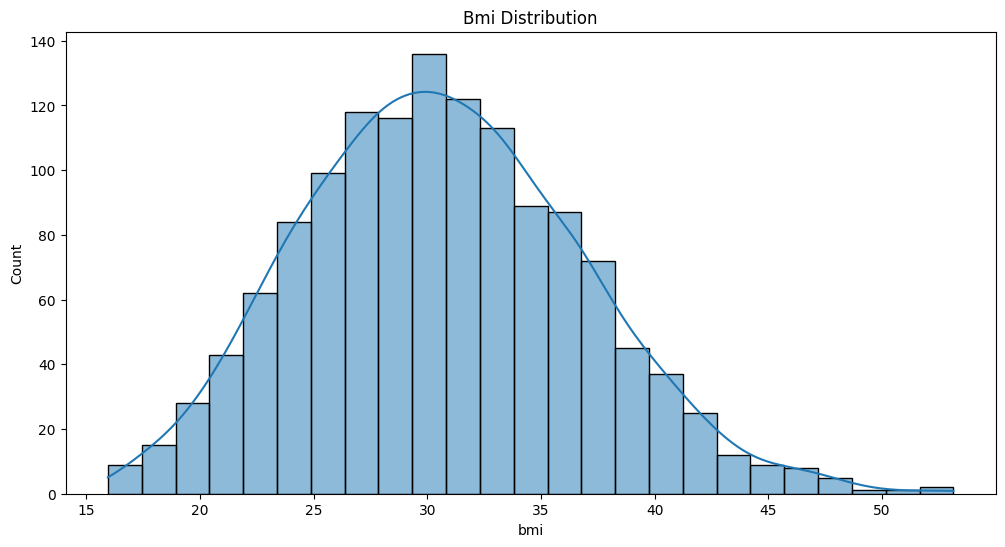

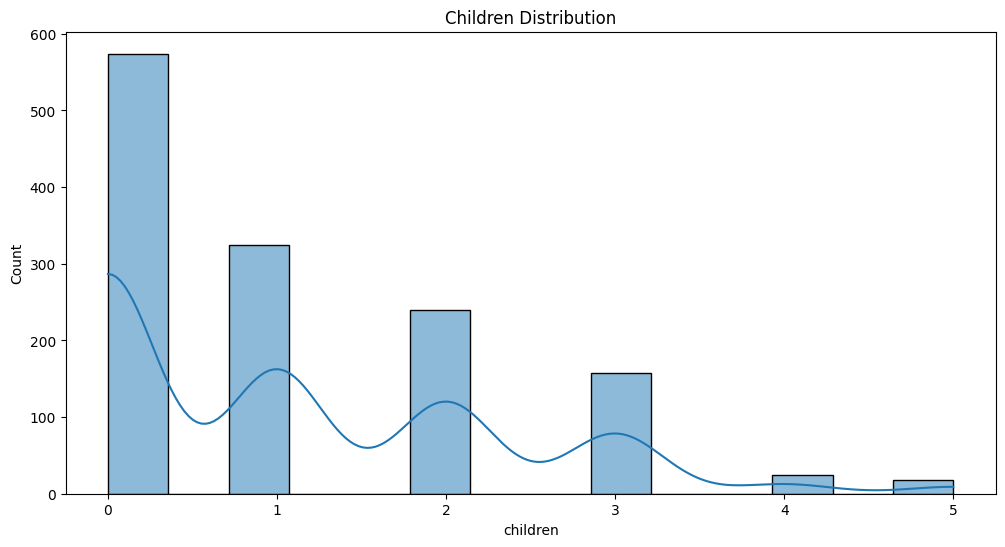

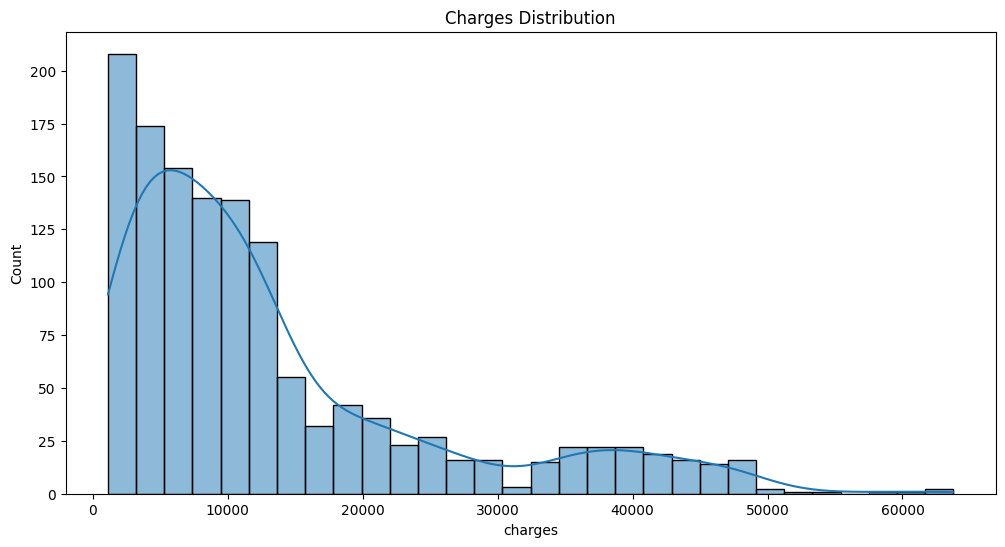

In [37]:
cols = ['age', 'bmi', 'children', 'charges']
for col in cols:
    plt.figure(figsize=(12, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'{col.capitalize()} Distribution')
    plt.show()

### Observations from the visualizations: 
* These distributions reveal if data transformations or additional preprocessing might be needed.

## 5: Encoding Categorical Data

In [38]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})
df['region'] = df['region'].map({'southwest': 0, 'southeast': 1, 'northwest': 2, 'northeast': 3})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,0,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,2,21984.47061
4,32,0,28.880,0,0,2,3866.85520


## 6: Correlation Analysis

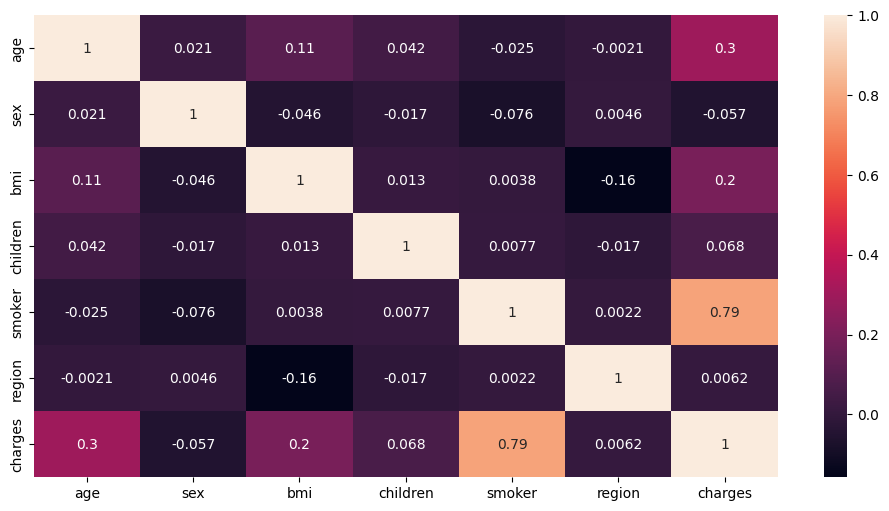

In [39]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot = True)
plt.show()

## Observation: 
* A high correlation between smoker and charges implies that smoking significantly impacts medical costs.

## 7: Data Splitting

In [40]:
# splitting the dataset
X = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Model Building and Evaluation

## 8: Baseline Model - Linear Regression
Linear Regression serves as our baseline, providing insights into the linear relationship between features and charges.

R2 Score: 0.7833463107364539
Mean Absolute Error: 4186.508898366434


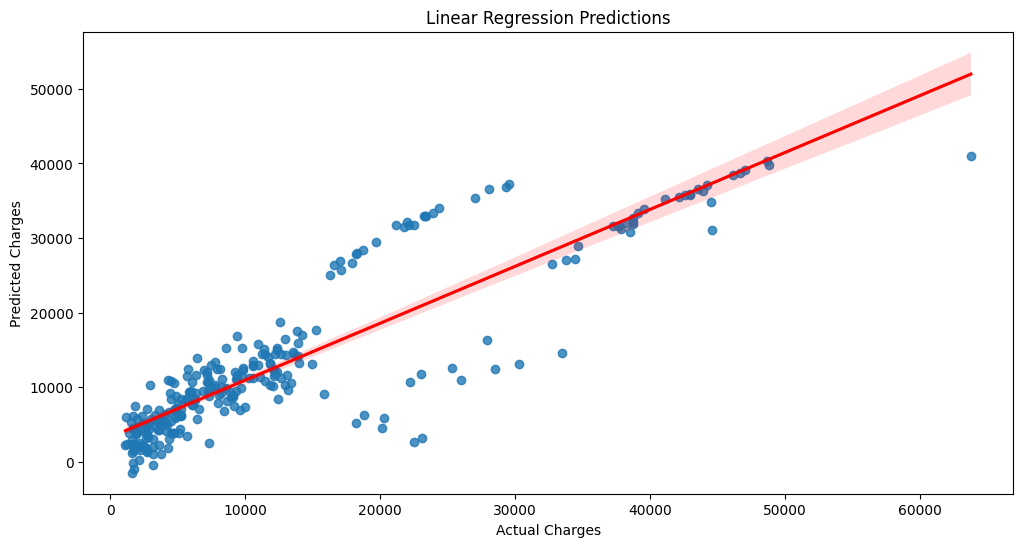

In [41]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(12, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "red"})
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

### Observation: 
* The results indicate that Linear Regression may not capture complex, non-linear relationships in the data.

## 9: Enhanced Model - XGBoost
We apply XGBoost, a more powerful regression model, to capture non-linear dependencies and interactions.

R2 Score: 0.8501724363405039
Mean Absolute Error: 2793.646105652861


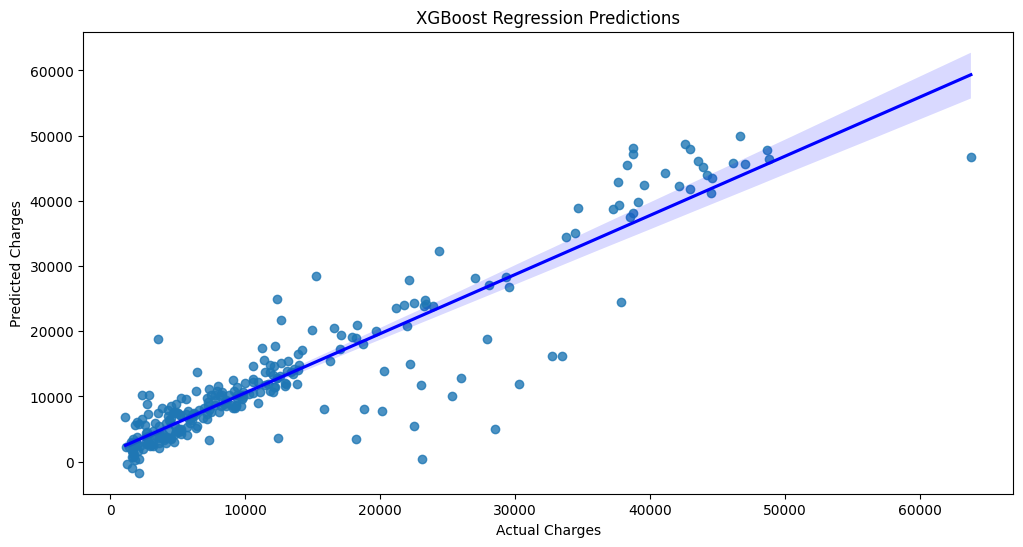

In [42]:
xgb = XGBRegressor()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('R2 Score:', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))

plt.figure(figsize=(12, 6))
sns.regplot(x=y_test, y=y_pred, line_kws={"color": "blue"})
plt.title('XGBoost Regression Predictions')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()

### Observation:
* XGBoost demonstrates improved accuracy over Linear Regression due to its ability to model complex patterns.

## 10: Comparison of Model Performance
###  **Linear Regression**: 
* Chosen for simplicity as a starting point, but limited in capturing non-linear relationships.


In [43]:
# making a prediction on Linear Regression model
input_data = (28,0,33,3,0,1)
input_data_reshaped = np.array(input_data).reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print('The insurance cost is:', prediction[0])

The insurance cost is: 7045.672396734024


###  **XGBoost Regression**: 
* Provides better performance due to its advanced structure, making it ideal for our dataset.

In [44]:
# making a prediction on XGBoost model
input_data = (28,0,33,3,0,1)
input_data_reshaped = np.array(input_data).reshape(1,-1)
prediction = xgb.predict(input_data_reshaped)
print('The insurance cost is:', prediction[0])

The insurance cost is: 4743.7393


##  Summary:
In this project, we analyzed medical insurance costs using two models:

*  **Linear Regression**: A baseline model that helps establish a foundational understanding of the dataset.
*  **XGBoost Regression**: An advanced model with improved predictive power, highlighting complex relationships in the data.

The analysis and comparisons show XGBoost as a preferable model, offering more accurate predictions for medical costs based on age, BMI, smoking habits, and other features.